In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from itertools import product
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Import the dataset to datafram
medical_df = pd.read_csv('C:/Users/MichaelRupert/Downloads/e9d8sm5uf8df75k650df/medical_cleaned_data.csv');

# Rename columns/variables of survey to easily recognizable features (ex: "Item1" to "TimelyResponse").
medical_df.rename(columns = {'Income' : 'Household_Income', 
                                 'TotalCharge': 'Daily_Average_Charges', 
                                 'Additional_Charges' : 'Average_Daily_Additional_Services',
                                 'Item1':'Timely_Admission','Item2':'Timely_Treatment',
                                 'Item3':'Timely_Visits',
                                 'Item4':'Reliability','Item5':'Options','Item6':'Hours_Treatment',
                                 'Item7':'Courteous_Staff','Item8':'Active_Listening'},inplace = True)
# Get a description of data frame, structure (columns & rows) & data types.
print("____________________________________________________________")
print("Below is a description and shape of the Data:")
print(medical_df.shape)
print(medical_df.describe())
print("____________________________________________________________")
#Check for duplicaes
Is_dups_bool = medical_df.duplicated()
print("Are there duplicates? ")
print(Is_dups_bool.value_counts())
print("____________________________________________________________")

medical_df.columns

medical_df['intercept'] = 1
model_VitD = sm.OLS(medical_df['VitD_levels'], medical_df[['State', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Children', 'Age', 'Education', 'Employment',
       'Household_Income', 'Marital', 'Gender', 'ReAdmis',
       'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'Daily_Average_Charges',
       'Additional_charges', 'Timely_Admission', 'Timely_Treatment',
       'Timely_Visits', 'Reliability', 'Options', 'Hours_Treatment',
       'Courteous_Staff', 'Active_Listening']]).fit()
#print(lm_ReAdmis.params)
print(model_VitD.summary())
#Remove Unwanted columns 
# new_Med_DF  =  medical_df.drop(labels=['ReAdmis', 'Soft_drink',
#        'Initial_admin',  'Stroke', 'Complication_risk',
#        'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
#        'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
#        'Services', 'Initial_days', 'Timely_Treatment',
#        'Timely_Visits', 'Reliability',  'Active_Listening'],axis=1)
# print(new_Med_DF)
print("____________________________________________________________")

print(new_Med_DF.shape)
print(new_Med_DF.describe())
print("____________________________________________________________")



# print(new_Med_DF.head(1))
nan_values = new_Med_DF.isnull()
nan_columns = nan_values.any()
columns_with_nan = new_Med_DF.columns[nan_columns].tolist()
print("Is the columns with null values.")
print(columns_with_nan)
print("____________________________________________________________")

print(new_Med_DF.columns)


____________________________________________________________
Below is a description and shape of the Data:
(9999, 46)
        Unnamed: 0        State           Zip          Lat          Lng  \
count  9999.000000  9999.000000   9999.000000  9999.000000  9999.000000   
mean   5000.000000    21.201620  50162.829383    38.750924   -91.244184   
std    2886.607005    12.910712  27468.724995     5.403327    15.206357   
min       1.000000     1.000000    610.000000    17.967190  -174.209690   
25%    2500.500000    11.000000  27600.500000    35.255120   -97.353525   
50%    5000.000000    19.000000  50208.000000    39.419060   -88.399240   
75%    7499.500000    33.000000  72412.500000    42.044220   -80.439205   
max    9999.000000    51.000000  99929.000000    70.560990   -65.290170   

          Population         Area     Timezone     Children          Age  ...  \
count    9999.000000  9999.000000  9999.000000  9999.000000  9999.000000  ...   
mean    10071.892214     1.993299    -5.8607

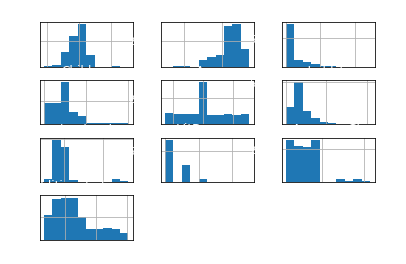

In [35]:
#Let's Create Two arrays one for Continuous varaibles and one for non-Continuous or Categorical
continuous_Ar = {'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Household_Income',  'VitD_levels', 'VitD_supp', 'Daily_Average_Charges', 'Additional_charges'}

categorical_Ar = {'State', 'Zip', 'Area',
       'Timezone', 'Education', 'Employment','Marital', 'Gender',  'Doc_visits',
       'Full_meals_eaten', 'HighBlood', 'Overweight','Timely_Admission',
       'Options', 'Hours_Treatment', 'Courteous_Staff'}

full_ar = {'State', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Children', 'Age', 'Education', 'Employment',
       'Household_Income', 'Marital', 'Gender', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'HighBlood', 'Overweight',
       'Daily_Average_Charges', 'Additional_charges', 'Timely_Admission',
       'Options', 'Hours_Treatment', 'Courteous_Staff'}
#Univariate Distributions
new_Med_DF[['Lat', 'Lng', 'Population', 'Children', 'Age',
       'Household_Income',  'VitD_levels', 'VitD_supp', 'Daily_Average_Charges', 'Additional_charges']].hist()

plt.savefig('medical_pyplot.jpg')


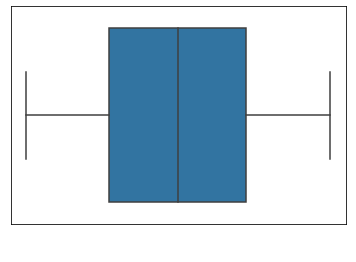

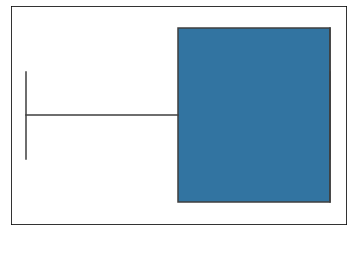

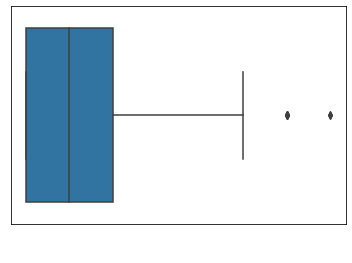

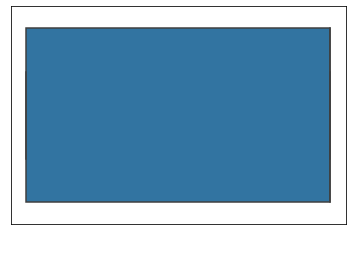

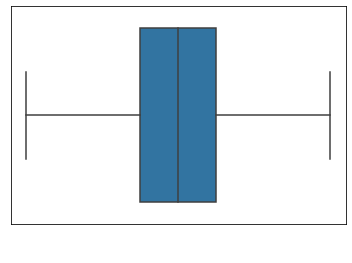

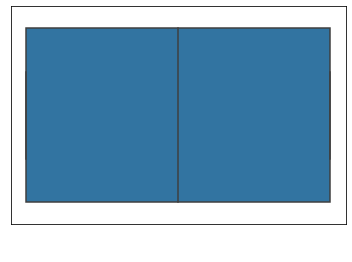

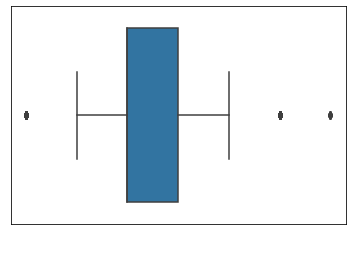

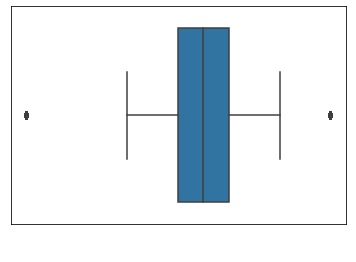

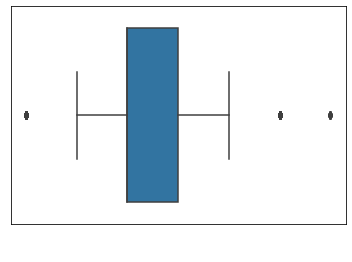

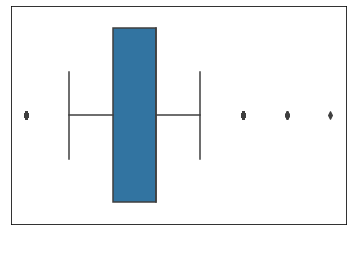

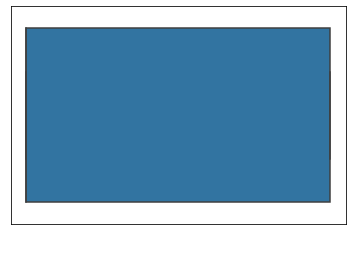

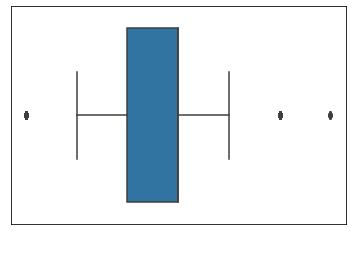

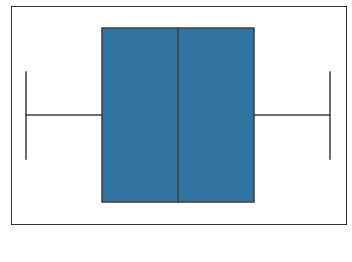

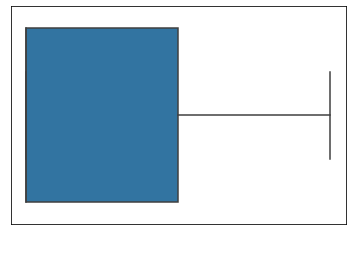

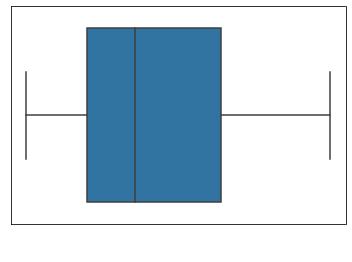

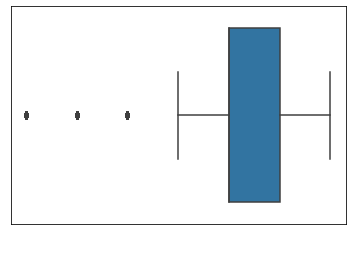

In [36]:
#preform boxplots on categorical vairbales

for x in categorical_Ar:
    
    sns.boxplot(x, data = new_Med_DF)
    plt.show()

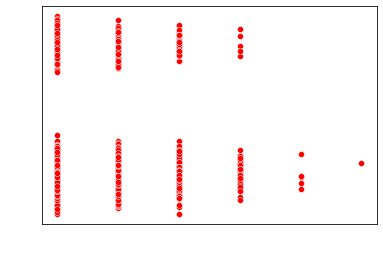

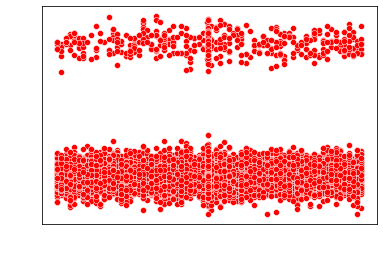

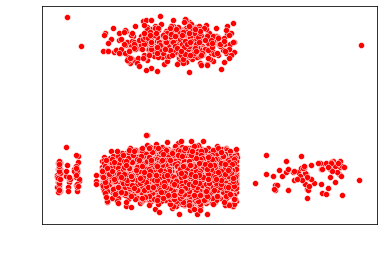

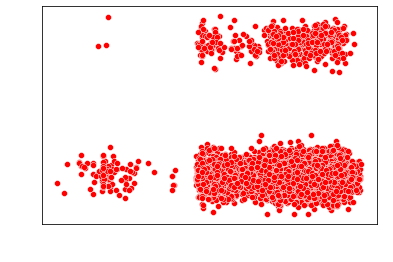

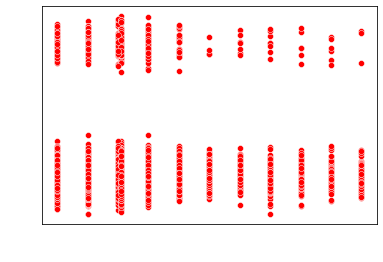

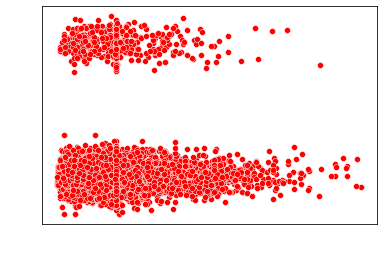

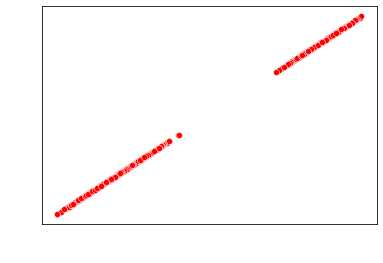

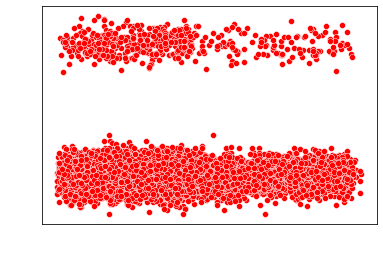

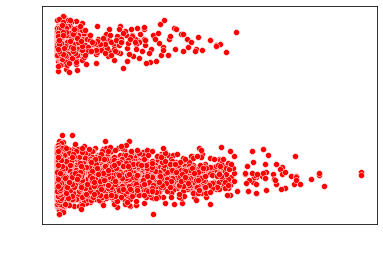

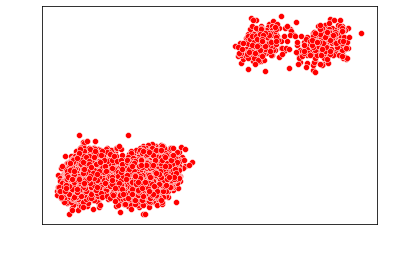

In [37]:
# Run scatterplots to show direct or inverse relationships between target & independent variablesfor x in VariableList: 

for v in (continuous_Ar):
    sns.scatterplot(x=new_Med_DF[v], y=new_Med_DF['VitD_levels'],color='red')
    plt.show();

In [38]:

new_Med_DF['intercept'] = 1
model_VitD_clean = sm.OLS(medical_df['VitD_levels'], medical_df[['Lat', 'Lng', 'Population', 'Children', 'Age',
                                                                 'Education', 'Employment', 'Household_Income', 'Marital',
                                                                 'Gender', 'ReAdmis', 'Full_meals_eaten', 'Initial_admin',
                                                                 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
                                                                 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Reflux_esophagitis',
                                                                 'Services', 'Initial_days', 'Daily_Average_Charges',
                                                                 'Timely_Admission', 'Reliability' ]]).fit()
#print(lm_ReAdmis.params)
print(model_VitD_clean.summary())
print(model_VitD_clean.params)

                                 OLS Regression Results                                
Dep. Variable:            VitD_levels   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          2.197e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):                        0.00
Time:                        22:47:48   Log-Likelihood:                         -24087.
No. Observations:                9999   AIC:                                  4.823e+04
Df Residuals:                    9973   BIC:                                  4.841e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [39]:
v2_Med_data_cleaned = new_Med_DF.drop(labels=['State','Population','Timezone','Children',
                                              'Age','Employment','Marital', 'VitD_supp','HighBlood',
                                              'Courteous_Staff'],axis=1)

# print(v2_Med_data_cleaned.columns)
# print(v2_Med_data_cleaned.shape)

v2_Med_data_cleaned.to_csv('D208_prepared_Dataset.csv', index=False)                                     
model_V2_Med_Data_cleaned = sm.OLS(new_Med_DF['VitD_levels'], new_Med_DF[['Zip', 'Lat', 
       'Lng', 'Area', 'Education',
       'Household_Income', 'Gender',  'Doc_visits',
       'Full_meals_eaten', 'Overweight', 'Daily_Average_Charges',
       'Additional_charges', 'Timely_Admission', 'Options', 'Hours_Treatment']]).fit()
print(model_V2_Med_Data_cleaned.summary())

                                 OLS Regression Results                                
Dep. Variable:            VitD_levels   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          1.235e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):                        0.00
Time:                        22:47:48   Log-Likelihood:                         -29546.
No. Observations:                9999   AIC:                                  5.912e+04
Df Residuals:                    9984   BIC:                                  5.923e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [40]:
v3_med_data_cleaned = new_Med_DF.drop(columns=[ 'Zip', 'Education', 'Timely_Admission', 
                                               'intercept', 'Area','Doc_visits', 'Gender',
                                               'Additional_charges', 'Options', 'Hours_Treatment',
                                               'State','Population','Timezone','Children','Age',
                                               'Employment','Marital', 'VitD_supp','HighBlood',
                                               'Courteous_Staff'],axis=1)
v3_med_data_cleaned.columns

Index(['Unnamed: 0', 'Lat', 'Lng', 'Household_Income', 'VitD_levels',
       'Full_meals_eaten', 'Overweight', 'Daily_Average_Charges'],
      dtype='object')

In [41]:
model_v3_Med_Data = sm.OLS(v3_med_data_cleaned["VitD_levels"],v3_med_data_cleaned[[ 'Lat', 'Lng',  'Household_Income',
       'Full_meals_eaten', 'Overweight',
       'Daily_Average_Charges']]).fit()
print(model_v3_Med_Data.summary())

                                 OLS Regression Results                                
Dep. Variable:            VitD_levels   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          2.960e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):                        0.00
Time:                        22:47:49   Log-Likelihood:                         -29749.
No. Observations:                9999   AIC:                                  5.951e+04
Df Residuals:                    9993   BIC:                                  5.955e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [42]:
print(model_v3_Med_Data.params)

Lat                      0.151049
Lng                     -0.038984
Household_Income         0.000009
Full_meals_eaten         0.204798
Overweight               0.521523
Daily_Average_Charges    0.001515
dtype: float64


In [43]:
mse_mdl_v2 = model_VitD.mse_resid
mse_mdl_v3 = model_VitD_clean.mse_resid
print(model_VitD.mse_resid)
print(model_VitD_clean.mse_resid)
print(np.sqrt(mse_mdl_v2))
print(np.sqrt(mse_mdl_v3))


6.893574159810773
7.261644140440364
2.6255616846325993
2.694743798664423


In [44]:
# start exploring the models using imput variables and categorical variables
Lat =  np.arange(0,80, 10)
Lng =  np.arange(-180,-30, 10)
HouseHold_incm = np.arange(0,300000, 10000)
Meals = v3_med_data_cleaned["Full_meals_eaten"].unique()
overweight = v3_med_data_cleaned["Overweight"].unique()
Daily_Average_Charges = np.arange(1000,50000, 2000)

p = product(Lat,Lng,HouseHold_incm,Meals,overweight,Daily_Average_Charges)

explanatory_data = pd.DataFrame(p, columns = [ 'Lat', 'Lng',  'Household_Income',
       'Full_meals_eaten', 'Overweight',
       'Daily_Average_Charges'])
prediction_data_Daily_Charge = explanatory_data.assign(VitD_levels = model_v3_Med_Data.predict(explanatory_data) )
# #sns.scatterplot(x="Daily_Average_Charges", y="State",)
print(prediction_data_Daily_Charge)

         Lat  Lng  Household_Income  Full_meals_eaten  Overweight  \
0          0 -180                 0                 0    0.000000   
1          0 -180                 0                 0    0.000000   
2          0 -180                 0                 0    0.000000   
3          0 -180                 0                 0    0.000000   
4          0 -180                 0                 0    0.000000   
...      ...  ...               ...               ...         ...   
2159995   70  -40            290000                 6    0.709105   
2159996   70  -40            290000                 6    0.709105   
2159997   70  -40            290000                 6    0.709105   
2159998   70  -40            290000                 6    0.709105   
2159999   70  -40            290000                 6    0.709105   

         Daily_Average_Charges  VitD_levels  
0                         1000     8.531980  
1                         3000    11.561857  
2                         5000   

In [45]:
# start exploring the models using imput variables and categorical variables

Lat =  np.arange(0,80, 10)
Lng =  np.arange(-180,-30, 10)
HouseHold_incm = np.arange(0,300000, 10000)
VitD = np.arange(5,80, 5)
Meals = v3_med_data_cleaned["Full_meals_eaten"].unique()
overweight = v3_med_data_cleaned["Overweight"].unique()
Daily_Average_Charges = np.arange(1000,50000, 2000)

p = product(Lat, Lng, HouseHold_incm , Meals, overweight, Daily_Average_Charges)

explanatory_data = pd.DataFrame(p, columns = ['Lat', 'Lng', 'Household_Income', 'Full_meals_eaten', 'Overweight', 'Daily_Average_Charges'])


In [46]:
prediction_data_Daily_Charge= explanatory_data.assign(VitD_Levels = model_v3_Med_Data.predict(explanatory_data) )

print(prediction_data_Daily_Charge)

         Lat  Lng  Household_Income  Full_meals_eaten  Overweight  \
0          0 -180                 0                 0    0.000000   
1          0 -180                 0                 0    0.000000   
2          0 -180                 0                 0    0.000000   
3          0 -180                 0                 0    0.000000   
4          0 -180                 0                 0    0.000000   
...      ...  ...               ...               ...         ...   
2159995   70  -40            290000                 6    0.709105   
2159996   70  -40            290000                 6    0.709105   
2159997   70  -40            290000                 6    0.709105   
2159998   70  -40            290000                 6    0.709105   
2159999   70  -40            290000                 6    0.709105   

         Daily_Average_Charges  VitD_Levels  
0                         1000     8.531980  
1                         3000    11.561857  
2                         5000   

In [47]:

residuals = model_VitD_clean.resid

In [48]:
print(residuals)

0       2.966099
1       0.847724
2       0.795804
3       0.446725
4       2.110563
          ...   
9994    0.324291
9995   -2.016190
9996    1.788377
9997   -6.394581
9998    1.997294
Length: 9999, dtype: float64


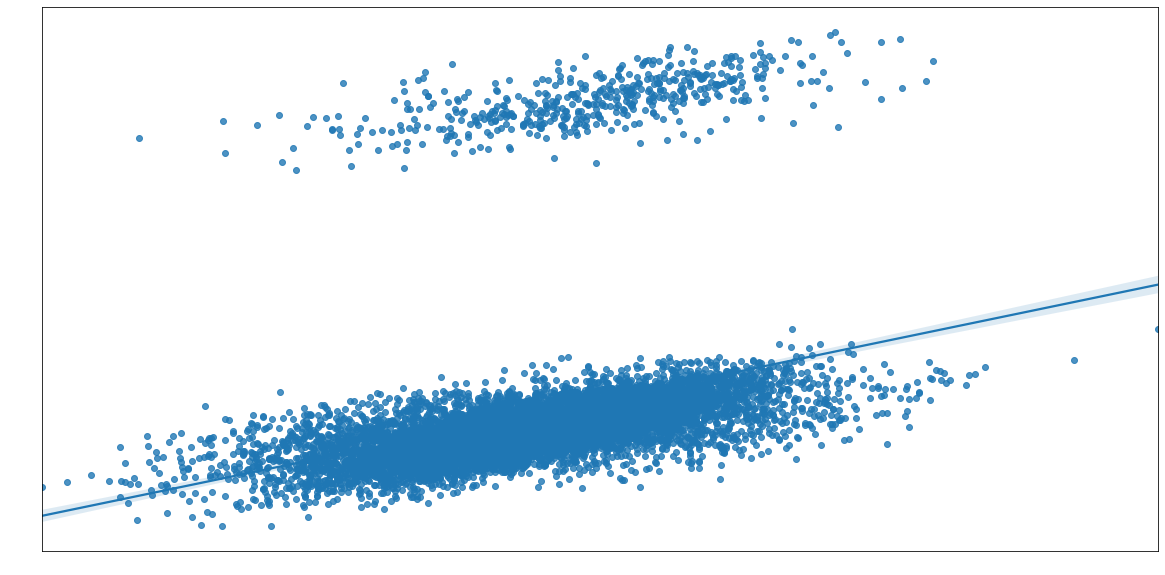

In [49]:
fig = plt.figure(figsize=(20,10))
fig = sns.regplot(residuals, medical_df["VitD_levels"])
plt.show()